# ** AULA 4 : Estatística e Correlações do ENEM**

## Analise Preditiva da Base com dados do ENEM.

Importando Bibliotecas

In [1]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url = "https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = pd.read_csv(url)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,1,2207702.0,Parnaíba,22.0,PI,1,5,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,1,3557105.0,Votuporanga,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,160.0,120.0,120.0,160.0,120.0,680.0,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,1,2506301.0,Guarabira,25.0,PB,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,120.0,600.0,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,1,3514403.0,Dracena,35.0,SP,2,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,100.0,120.0,100.0,80.0,0.0,400.0,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,1,3550308.0,São Paulo,35.0,SP,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [3]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [4]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.378440e+05,137844.0,1.378440e+05,137844.000000,137843.000000,132485.000000,137844.000000,137844.000000,1.331400e+05,133140.000000,137844.000000,137844.000000,137844.000000,86900.000000,137844.000000,3.623200e+04,3.623200e+04,36232.000000,36232.000000,36232.000000,36232.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.0,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,...,137844.000000,137844.0,137844.0,137844.0,137844.0,137844.000000,137844.000000,137844.000000,137844.000000,137844.0,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,137844.000000,1.378440e+05,137844.000000,137838.000000,137838.000000,137838.000000,137838.000000,97537.000000,103774.000000,103774.000000,97537.000000,97537.000000,103774.000000,103774.000000,97537.000000,137844.000000,103774.000000,103774.000000,103774.000000,103774.000000,103774.000000,103774.000000,103774.000000,137844.000000
mean,1.800104e+11,2018.0,3.118377e+06,31.030701,22.378967,0.120655,2.123204,1.039001,3.085665e+06,30.701893,1.540568,3.000559,1.344302,1.200587,0.096116,3.158708e+07,3.160970e+06,31.452528,2.310030,1.034776,1.006127,0.000856,0.000102,0.000326,0.000443,0.0,0.001669,0.000305,0.001066,0.000203,0.000036,0.000181,0.000305,0.000783,0.000370,0.000987,0.000015,0.000015,0.001973,0.000058,...,0.000015,0.0,0.0,0.0,0.0,0.000109,0.000007,0.000007,0.000007,0.0,0.000058,0.000051,0.000022,0.000015,0.000015,0.000007,0.000058,3.119913e+06,31.047184,0.708012,0.753392,0.753392,0.708012,448.510155,452.515707,456.513462,460.504967,493.633406,568.309626,526.591341,535.178874,0.533313,1.103783,121.728564,101.695608,97.181953,117.028157,71.499027,509.133116,3.895447
std,1.918950e+06,0.0,9.944830e+05,9.916221,7.610313,0.376805,1.017945,0.231610,9.756807e+05,9.723525,0.722004,4.000202,0.701637,0.596257,0.294751,9.765074e+06,9.798715e+05,9.770447,0.779885,0.183214,0.118252,0.029246,0.010077,0.018065,0.021032,0.0,0.040814,0.017453,0.032639,0.014251,0.006023,0.013466,0.017453,0.027980,0.019231,0.031395,0.003809,0.003809,0.044378,0.007618,...,0.003809,0.0,0.0,0.0,0.0,0.010431,0.002693,0.002693,0.002693,0.0,0.007618,0.007126,0.004665,0.003809,0.003809,0.002693,0.007618,9.948001e+05,9.919332,0.455109,0.431644,0.431644,0.455109,1.213054,1.329739,1.309970,1.143691,74.183094,81.026551,73.024234,102.827600,0.498891,0.688518,31.323537,49.506448,47.001285,35.202051,52.205925,187.014052,1.505254
min,1.800072e+11,2018.0,1.100015e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100015e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.100006e+07,1.100015e+06,11.000000,1.000000,1.000000,1.00

Observa-se que o método describe, retorna apenas informações de dados numéricos.

Coletando apenas os dados das notas.

In [5]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.1,671.3,661.6,738.0,680.0
2,409.2,531.7,389.0,438.1,600.0
3,452.3,505.5,448.5,544.9,400.0
6,428.5,505.2,521.0,436.8,560.0
8,491.8,575.7,524.4,487.6,660.0


In [6]:
len(dados_notas)

97270

In [7]:
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.000000,0.571979,0.600252,0.579052,0.513206
ciencias_humanas,0.571979,1.000000,0.698270,0.529275,0.502914
linguagem_codigo,0.600252,0.698270,1.000000,0.565544,0.562957
matematica,0.579052,0.529275,0.565544,1.000000,0.483313
redacao,0.513206,0.502914,0.562957,0.483313,1.000000


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre linguagem_codigo e ciencias_humanas, o que parece fazer sentido. Uma correlação que surpreende é entre linguagem_codigo e redacao

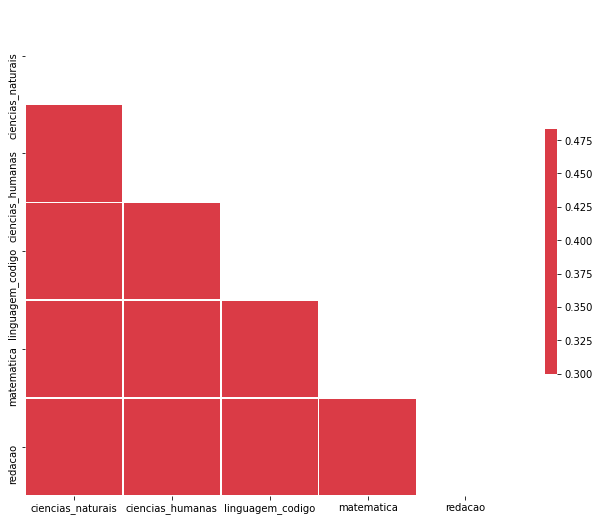

In [8]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

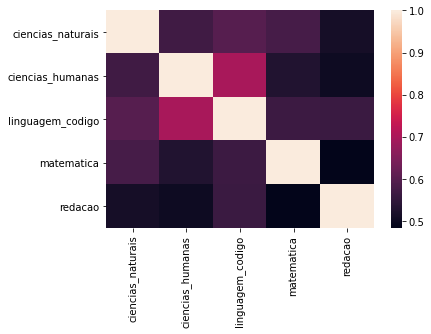

In [9]:
sns.heatmap(corr)

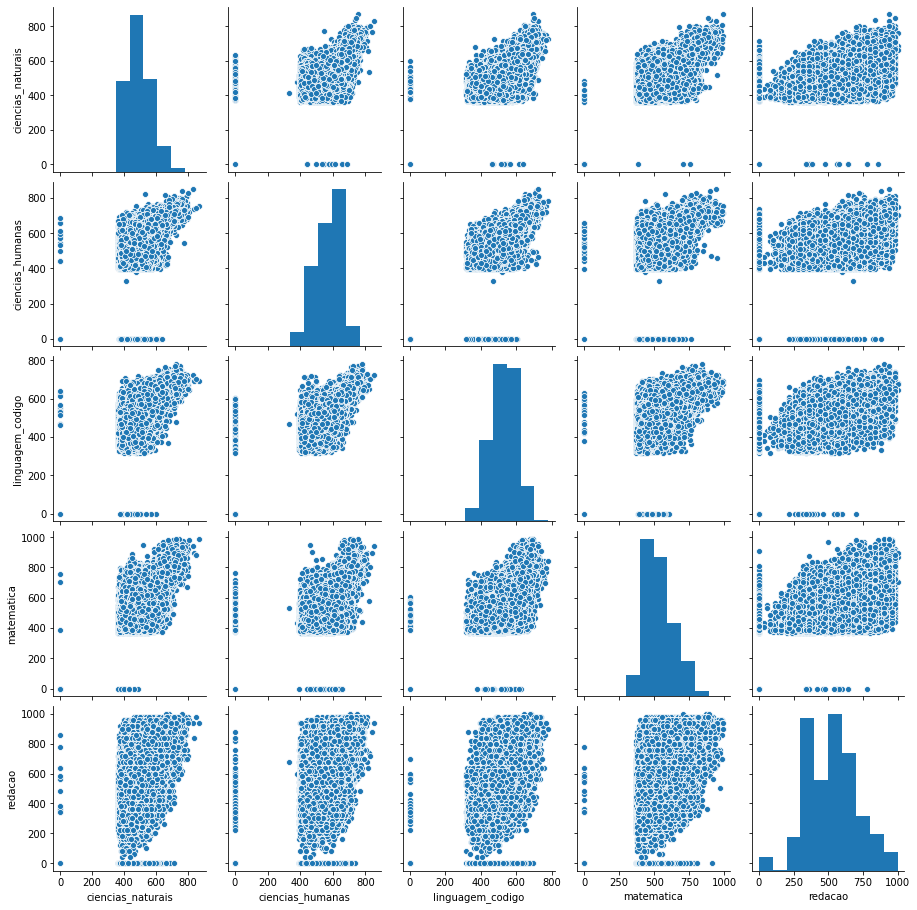

In [10]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível.

## Desafio 1

*   Se a pessoa não teve presença, preencha a nota dela com 0.




In [11]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.0,M,1.0,1,1,2207702.0,Parnaíba,22.0,PI,1,5,1,3.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.0,M,0.0,1,1,3557105.0,Votuporanga,35.0,SP,4,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.0,160.0,120.0,120.0,160.0,120.0,680.0,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.0,F,0.0,2,1,2506301.0,Guarabira,25.0,PB,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.0,120.0,120.0,120.0,120.0,120.0,600.0,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.0,F,0.0,2,1,3514403.0,Dracena,35.0,SP,2,0,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.0,100.0,120.0,100.0,80.0,0.0,400.0,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.0,M,0.0,3,1,3550308.0,São Paulo,35.0,SP,1,2,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [0]:
faltou = 0
presente = 1
eliminado = 2

In [0]:
dados_desafio1 = dados.copy()

In [14]:
dados_desafio1[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_MT','TP_PRESENCA_LC','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,523.1,671.3,661.6,738.0
2,1.0,1.0,1.0,1.0,409.2,531.7,389.0,438.1
3,1.0,1.0,1.0,1.0,452.3,505.5,448.5,544.9
4,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
137839,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
137840,1.0,1.0,1.0,1.0,382.4,534.2,468.1,576.4
137841,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
137842,1.0,1.0,1.0,1.0,452.7,509.3,527.7,591.4


In [0]:
for tipo in ["CN", "CH", "MT", "LC"]:
  dados_desafio1.loc[dados['TP_PRESENCA_'+ tipo].isin([faltou, eliminado]), 'NU_NOTA_'+tipo] = 0

In [16]:
dados_desafio1[['TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_MT','TP_PRESENCA_LC','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_MT,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,523.1,671.3,661.6,738.0
2,1.0,1.0,1.0,1.0,409.2,531.7,389.0,438.1
3,1.0,1.0,1.0,1.0,452.3,505.5,448.5,544.9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
137839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137840,1.0,1.0,1.0,1.0,382.4,534.2,468.1,576.4
137841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137842,1.0,1.0,1.0,1.0,452.7,509.3,527.7,591.4


## Desafio 2

* A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas

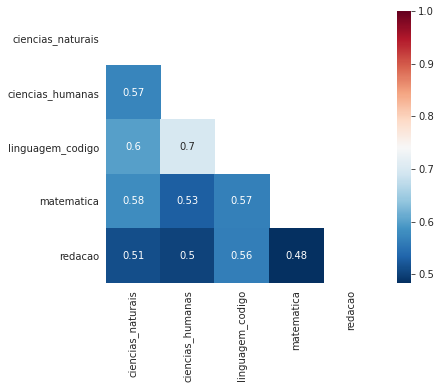

In [17]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap="RdBu_r",annot=True)

## Desafio 3

* Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação).Usar o gabarito e as respostas

In [0]:
dados.dropna(subset=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT','NU_NOTA_REDACAO'], inplace=True)

In [0]:
dados_respostas_gabarito = dados.loc[:,['NU_INSCRICAO','TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT','NU_NOTA_REDACAO']]

Testando com os 5 primeiros alunos

In [20]:
dados_test = dados_respostas_gabarito[1:5]
dados_test = dados_test.set_index('NU_INSCRICAO')
dados_test

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO
NU_INSCRICAO,,,,,,,,,
180008223824,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.0
180007859645,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.0
180009943059,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,560.0
180008290373,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,660.0


Criando funções para percorrer o vetor e comparar

In [0]:
def compara_sequencia(a: str, b: str) -> int:
  acertos = 0
  for i in range(len(a)):
    acertos += a[i] == b[i]
  return acertos

In [0]:
def processa_linha(linha):
  corretas = {'nota_redacao': linha["NU_NOTA_REDACAO"]}

  for tipo in ["CN", "CH", "MT", "LC"]:
    corretas["acertos_" + tipo] = compara_sequencia(linha["TX_RESPOSTAS_"+tipo], linha["TX_GABARITO_"+tipo])

  return pd.Series(corretas)

In [23]:
com_resposta_acertos_teste = dados_test.apply(processa_linha, axis=1)
com_resposta_acertos_teste

,nota_redacao,acertos_CN,acertos_CH,acertos_MT,acertos_LC
NU_INSCRICAO,,,,,
180008223824,600.0,8.0,9.0,6.0,8.0
180007859645,400.0,7.0,10.0,10.0,11.0
180009943059,560.0,11.0,9.0,8.0,15.0
180008290373,660.0,8.0,12.0,13.0,15.0


É possivel observar que com os dados teste deu tudo certo, agora vamos realizar o mesmo procedimento com os dataset original, e em seguida fazer a correlação das notas.

In [24]:
com_resposta_acertos = dados_respostas_gabarito.apply(processa_linha, axis=1)
com_resposta_acertos

,nota_redacao,acertos_CN,acertos_CH,acertos_MT,acertos_LC
1,680.0,11.0,27.0,22.0,33.0
2,600.0,8.0,9.0,6.0,8.0
3,400.0,7.0,10.0,10.0,11.0
6,560.0,11.0,9.0,8.0,15.0
8,660.0,8.0,12.0,13.0,15.0
...,...,...,...,...,...
137835,520.0,12.0,15.0,12.0,15.0
137836,580.0,6.0,12.0,11.0,14.0
137838,820.0,14.0,17.0,9.0,16.0
137840,380.0,7.0,11.0,13.0,13.0


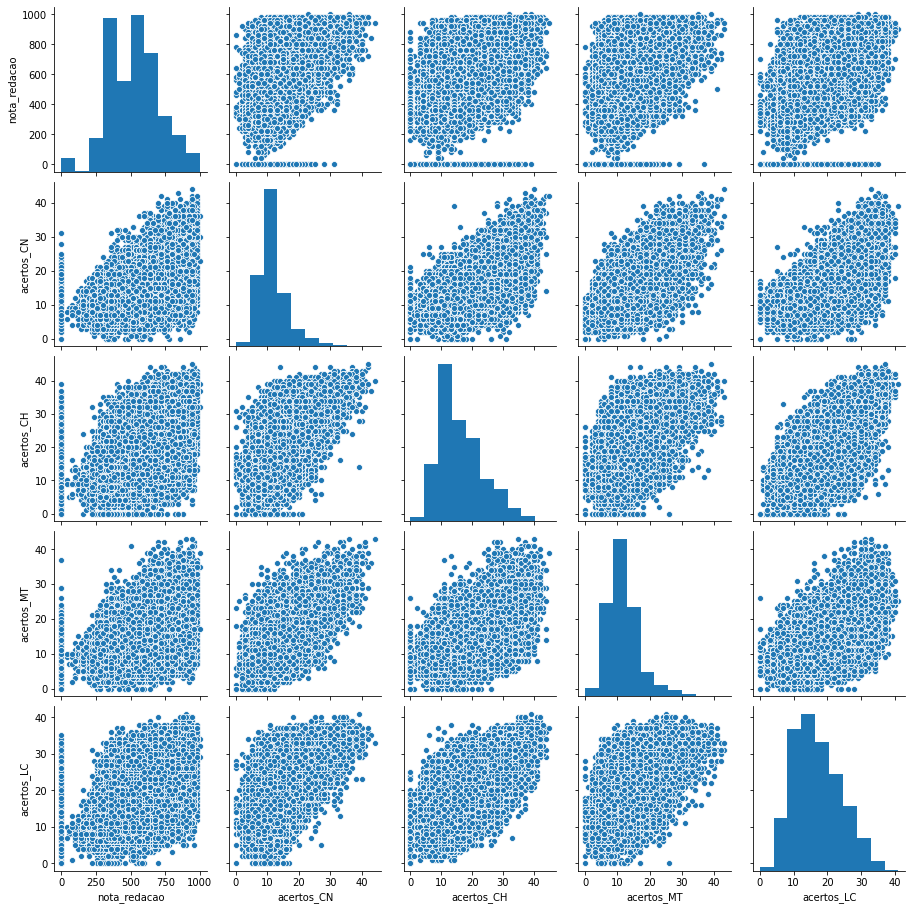

In [25]:
sns.pairplot(data=com_resposta_acertos)
plt.show()

## Desafio 4

* Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
dados_desafio1.to_csv('dados_notas_zeradas_desafio1.csv')

In [27]:
dados_desafio1.isnull().values.any()

True

In [0]:
dados_desafio4 = dados_desafio1.copy()

In [0]:
for tipo in ["CN", "CH", "MT", "LC"]:
  dados_desafio4['NU_NOTA_'+tipo] = dados_desafio1['NU_NOTA_'+tipo].replace(to_replace=0.,value=np.NAN)

In [30]:
dados_desafio4[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,NaN,NaN,NaN,NaN
1,523.1,671.3,661.6,738.0
2,409.2,531.7,389.0,438.1
3,452.3,505.5,448.5,544.9
4,NaN,NaN,NaN,NaN


In [0]:
dados_desafio4.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

In [32]:
dados_desafio4[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
1,523.1,671.3,661.6,738.0
2,409.2,531.7,389.0,438.1
3,452.3,505.5,448.5,544.9
6,428.5,505.2,521.0,436.8
8,491.8,575.7,524.4,487.6


Conferindo se a remoção foi concluida

In [35]:
dados_desafio4.isnull().any()

NU_INSCRICAO               False
NU_ANO                     False
CO_MUNICIPIO_RESIDENCIA    False
NO_MUNICIPIO_RESIDENCIA    False
CO_UF_RESIDENCIA           False
                           ...  
Q023                       False
Q024                       False
Q025                       False
Q026                       False
Q027                       False
Length: 137, dtype: bool

## Desafio 5

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def corrige_questoes(aluno, materia):
    respostas = aluno.get(f'TX_RESPOSTAS_{materia}')
    gabarito = aluno.get(f'TX_GABARITO_{materia}')
    
    return pd.Series([int(a==b) for a, b in zip(respostas, gabarito)])

In [37]:
# Analisando a prova azul de Ciências da Natureza
prova_cn_azul = dados.query('CO_PROVA_CN == 447')

matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)
matriz_acertos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
10,0,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
15,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
22,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
137808,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,0
137821,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0
137834,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


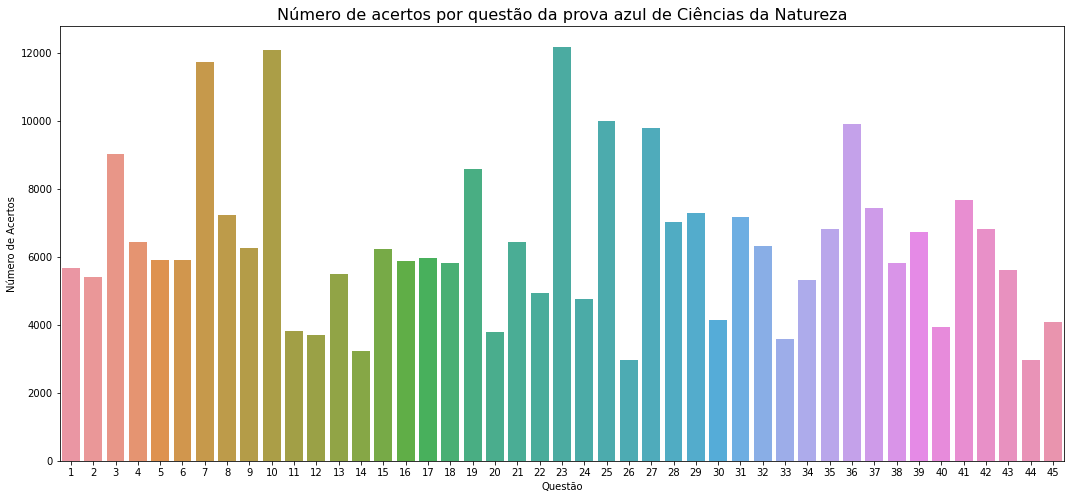

In [38]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

## Desafio 6

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.